In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('suicide.csv',encoding='Windows-1252')

In [7]:
df.head()

,S#,Date,Islamic Date,Blast Day Type,Holiday Type,Time,City,Latitude,Longitude,Province,...,Targeted Sect if any,Killed Min,Killed Max,Injured Min,Injured Max,No. of Suicide Blasts,Explosive Weight (max),Hospital Names,Temperature(C),Temperature(F)
0,1,Sunday-November 19-1995,25 Jumaada al-THaany 1416 A.H,Holiday,Weekend,NaN,Islamabad,33.7180,73.0718,Capital,...,None,14.0,15.0,NaN,60,2.0,NaN,NaN,15.835,60.503
1,2,Monday-November 6-2000,10 SHa`baan 1421 A.H,Working Day,NaN,NaN,Karachi,24.9918,66.9911,Sindh,...,None,NaN,3.0,NaN,3,1.0,NaN,NaN,23.770,74.786
2,3,Wednesday-May 8-2002,25 safar 1423 A.H,Working Day,NaN,7:45 AM,Karachi,24.9918,66.9911,Sindh,...,Christian,13.0,15.0,20.0,40,1.0,2.5 Kg,1.Jinnah Postgraduate Medical Center 2. Civil ...,31.460,88.628
3,4,Friday-June 14-2002,3 Raby` al-THaany 1423 A.H,Working Day,NaN,11:10:00 AM,Karachi,24.9918,66.9911,Sindh,...,Christian,NaN,12.0,NaN,51,1.0,NaN,NaN,31.430,88.574
4,5,Friday-July 4-2003,4 Jumaada al-awal 1424 A.H,Working Day,NaN,NaN,Quetta,30.2095,67.0182,Baluchistan,...,Shiite,44.0,47.0,NaN,65,1.0,NaN,1.CMH Quetta \n2.Civil Hospital 3. Boland Medi...,33.120,91.616


In [8]:
df.describe()

,S#,Latitude,Killed Min,Killed Max,Injured Min,No. of Suicide Blasts,Temperature(C),Temperature(F)
count,496.000000,493.000000,350.000000,480.000000,365.000000,414.000000,491.000000,489.000000
mean,248.500000,32.614705,14.725714,15.206250,31.397260,1.115942,21.111599,69.972579
std,143.327132,2.475917,17.600930,20.270436,38.603842,0.394989,8.369068,15.069622
min,1.000000,24.879503,0.000000,0.000000,0.000000,1.000000,-2.370000,27.734000
25%,124.750000,31.823800,3.000000,3.000000,7.000000,1.000000,14.690000,58.370000
50%,248.500000,33.583300,8.000000,8.000000,20.000000,1.000000,21.405000,70.529000
75%,372.250000,34.004300,20.000000,18.250000,40.000000,1.000000,28.115000,82.499000
max,496.000000,35.383300,125.000000,148.000000,320.000000,4.000000,44.000000,111.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   S#                       496 non-null    int64  
 1   Date                     496 non-null    object 
 2   Islamic Date             342 non-null    object 
 3   Blast Day Type           486 non-null    object 
 4   Holiday Type             72 non-null     object 
 5   Time                     285 non-null    object 
 6   City                     496 non-null    object 
 7   Latitude                 493 non-null    float64
 8   Longitude                493 non-null    object 
 9   Province                 496 non-null    object 
 10  Location                 493 non-null    object 
 11  Location Category        461 non-null    object 
 12  Location Sensitivity     460 non-null    object 
 13  Open/Closed Space        461 non-null    object 
 14  Influencing Event/Event  1

In [10]:
df.shape

(496, 26)

In [11]:
df.isnull().sum()

S#                           0
Date                         0
Islamic Date               154
Blast Day Type              10
Holiday Type               424
Time                       211
City                         0
Latitude                     3
Longitude                    3
Province                     0
Location                     3
Location Category           35
Location Sensitivity        36
Open/Closed Space           35
Influencing Event/Event    305
Target Type                 26
Targeted Sect if any        48
Killed Min                 146
Killed Max                  16
Injured Min                131
Injured Max                 32
No. of Suicide Blasts       82
Explosive Weight (max)     324
Hospital Names             199
Temperature(C)               5
Temperature(F)               7
dtype: int64

In [16]:
col = df.select_dtypes(include = ['int64','float64'])
col.corr

<bound method DataFrame.corr of       S#   Latitude  Killed Min  Killed Max  Injured Min  \
0      1  33.718000        14.0        15.0          NaN   
1      2  24.991800         NaN         3.0          NaN   
2      3  24.991800        13.0        15.0         20.0   
3      4  24.991800         NaN        12.0          NaN   
4      5  30.209500        44.0        47.0          NaN   
..   ...        ...         ...         ...          ...   
491  492  28.571051        21.0        22.0         25.0   
492  493        NaN         7.0         7.0         22.0   
493  494  30.221057         2.0         2.0          8.0   
494  495  33.970623         1.0         3.0          6.0   
495  496  30.139626         4.0         4.0         16.0   

     No. of Suicide Blasts  Temperature(C)  Temperature(F)  
0                      2.0          15.835          60.503  
1                      1.0          23.770          74.786  
2                      1.0          31.460          88.628  
3  

(array([325.,  79.,  38.,  15.,   9.,   7.,   5.,   0.,   0.,   2.]),
 array([  0. ,  14.8,  29.6,  44.4,  59.2,  74. ,  88.8, 103.6, 118.4,
        133.2, 148. ]),
 <BarContainer object of 10 artists>)

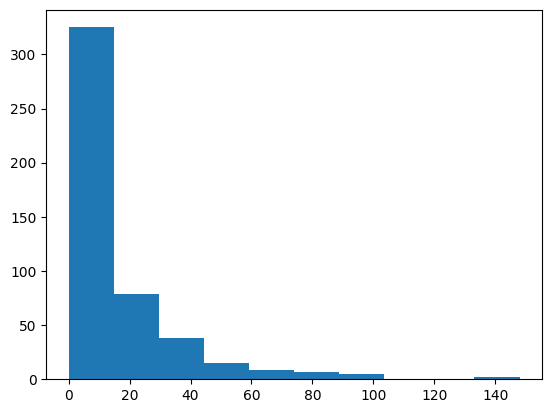

In [18]:
plt.hist(df['Killed Max'])

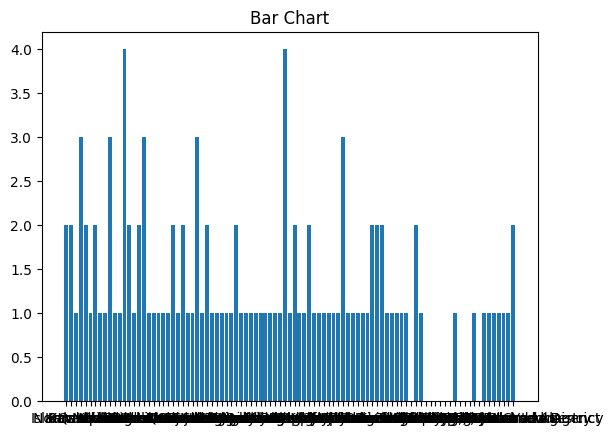

<Figure size 1000x500 with 0 Axes>

In [38]:
plt.bar(df['City'], df['No. of Suicide Blasts'])
 
plt.title("Bar Chart")
plt.figure(figsize = (10,5))

# plt.xlabel('City')
# plt.ylabel('No. of Suicide Blasts')


plt.show()

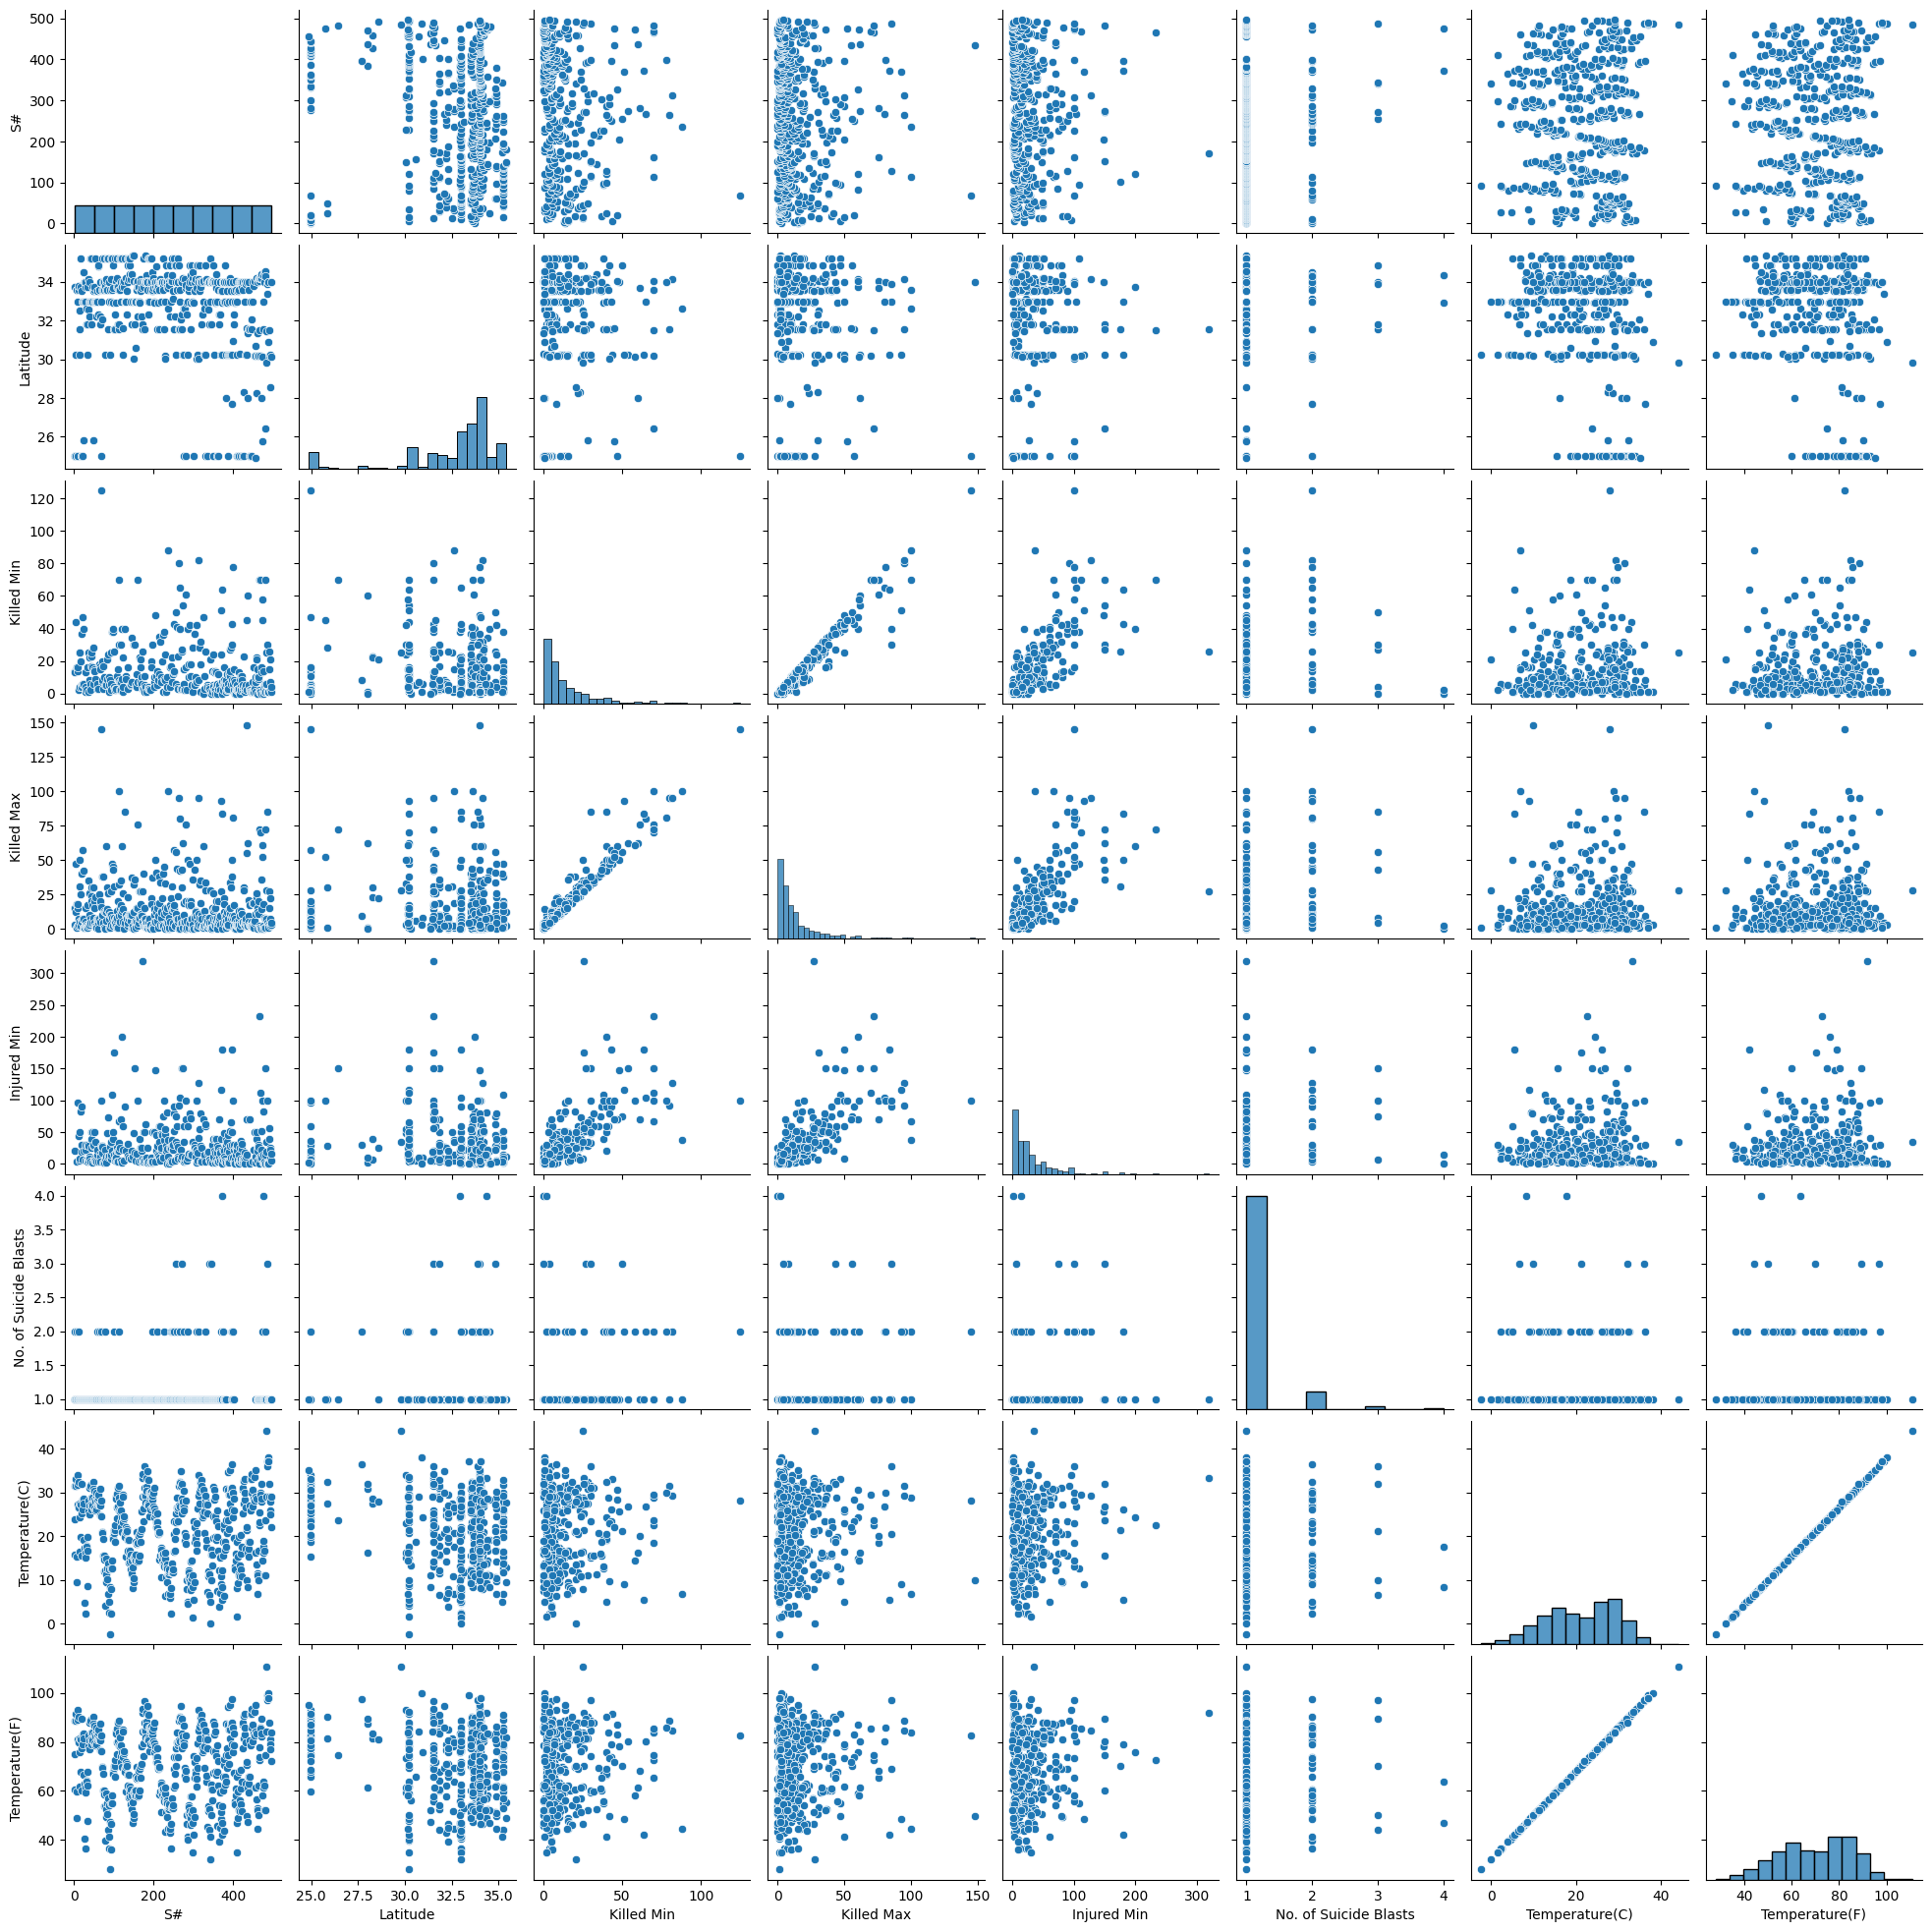

In [36]:
sns.pairplot(df)